### Libraries

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from pathlib import Path

### Analysis

In [16]:
data_dir = "../data/raw"
data = {}
for csv_file in Path(data_dir).glob("*.csv"):
    df = pd.read_csv(csv_file)
    data[csv_file.stem] = {
        "values": df["Value"].values,
        "diff": np.diff(df["Value"].diff().values)
    }

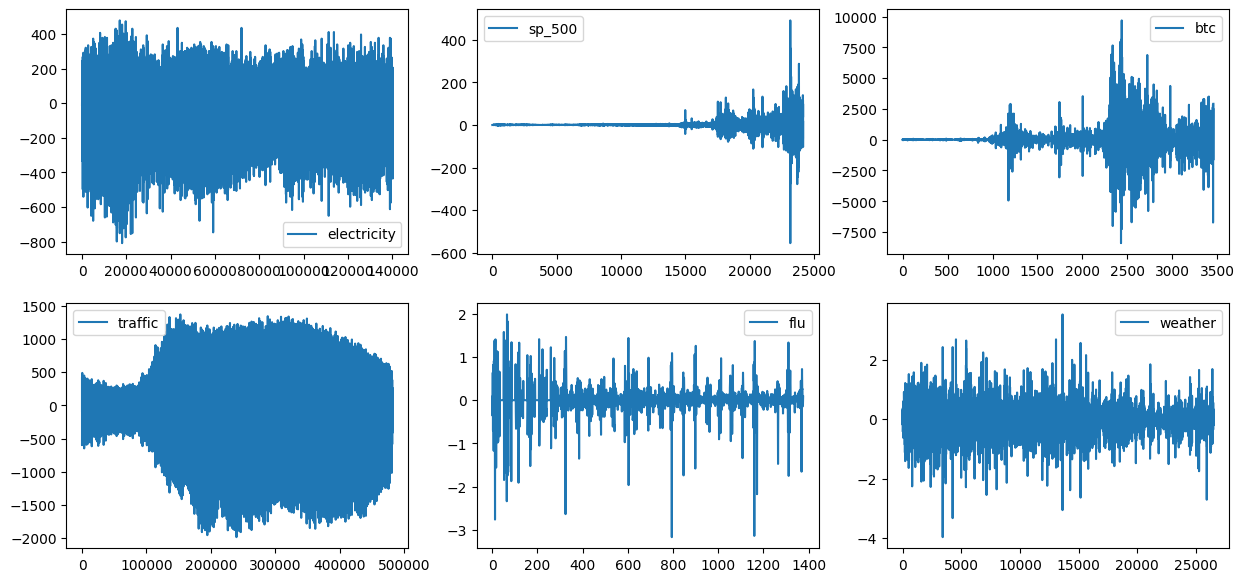

In [27]:
cols = 3
rows = len(data) // cols + int(len(data) % cols != 0)
fig, axes = plt.subplots(rows, cols, figsize=(15, 7))
for i, (dataset_name, values) in enumerate(data.items()):
    row = i // cols
    col = i % cols
    axes[row][col].plot(values["diff"], label=dataset_name)
    axes[row][col].legend()
plt.legend()
plt.show()